<a href="https://colab.research.google.com/github/WuilsonEstacio/python-for-data-science/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from joblib import parallel, delayed

<a href= https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/graphical-summary/interpret-the-results/all-statistics-and-graphs/ >estadistica interpretacion </a>

In [ ]:
df = pd.read_csv('/content/House_Price.csv')
df=df[['price',	'crime_rate',	'resid_area',	'air_qual',	'room_num',	'age',	'dist1',	'dist2',	'dist3',	'dist4',	'teachers',	'poor_prop',	'airport',	'n_hos_beds',	'n_hot_rooms',	'waterbody',	'rainfall']].dropna() # dropna se utliza para eliminar datos perdidos o faltantes
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        498 non-null    float64
 1   crime_rate   498 non-null    float64
 2   resid_area   498 non-null    float64
 3   air_qual     498 non-null    float64
 4   room_num     498 non-null    float64
 5   age          498 non-null    float64
 6   dist1        498 non-null    float64
 7   dist2        498 non-null    float64
 8   dist3        498 non-null    float64
 9   dist4        498 non-null    float64
 10  teachers     498 non-null    float64
 11  poor_prop    498 non-null    float64
 12  airport      498 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  498 non-null    float64
 15  waterbody    498 non-null    object 
 16  rainfall     498 non-null    int64  
dtypes: float64(14), int64(1), object(2)
memory usage: 70.0+ KB


In [ ]:
df.shape # numero de columnas y filas

(498, 17)

In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,22.578715,3.588968,41.126526,0.553869,6.287412,68.464056,3.985221,3.641988,3.973394,3.630462,21.541165,12.599116,7.899767,13.047809,39.305221
std,9.191142,8.605442,6.881695,0.115869,0.703900,28.253422,2.112560,2.113405,2.125105,2.104930,2.162552,7.152105,1.476683,5.275820,12.535150
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000
25%,17.025000,0.080573,35.145000,0.449000,5.885500,44.550000,2.270000,1.940000,2.232500,1.940000,19.800000,6.905000,6.634500,11.189800,28.000000
50%,21.200000,0.253715,39.690000,0.538000,6.210000,77.150000,3.405000,3.050000,3.395000,3.105000,20.950000,11.300000,7.999000,13.048800,40.000000
75%,25.000000,3.647422,48.100000,0.624000,6.623500,94.100000,5.400000,5.000000,5.417500,5.005000,22.600000,16.930000,9.088000,14.169400,50.750000
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000


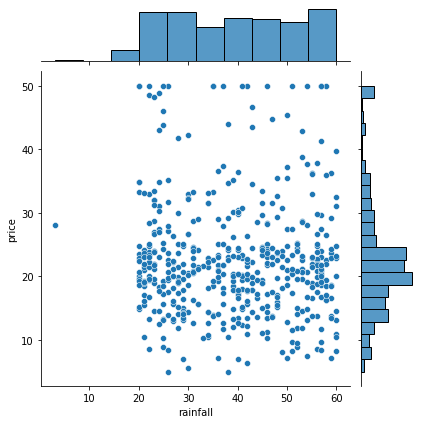

In [ ]:
sns.jointplot(x='rainfall', y='price', data=df)

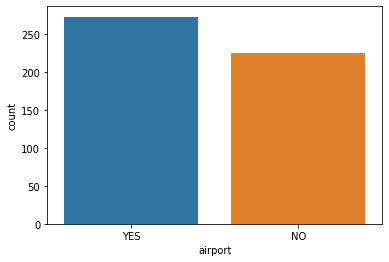

In [ ]:
sns.countplot(x='airport', data=df) # analizamos variables categoricas

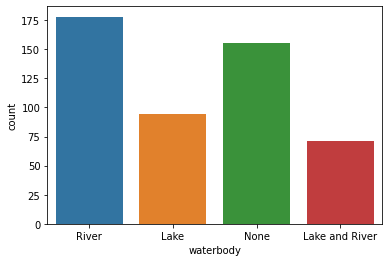

In [ ]:
sns.countplot(x='waterbody', data=df)

In [ ]:
np.percentile(df.n_hot_rooms,[99]) # reprecenta el percentil 99

array([15.4])

In [ ]:
np.percentile(df.n_hot_rooms,[99])[0] # colocamos ese array como valor numerico

15.4

In [ ]:
uv=np.percentile(df.n_hot_rooms,[99])[0] # guardamos el valor del percentile

In [ ]:
df[(df.n_hot_rooms>uv)] # obtenemos los valores que tenga un percentil mayor a 99 para hallar los outliers

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38
423,13.4,7.05042,48.10,0.614,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29


In [ ]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)]=3*uv

In [ ]:
np.percentile(df.rainfall,[1])[0] # percentil 1 para rainfall

20.0

In [ ]:
lv=np.percentile(df.rainfall,[1])[0]

In [ ]:
df[(df.rainfall<lv)] # columnas que cumplen la condicion 

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3


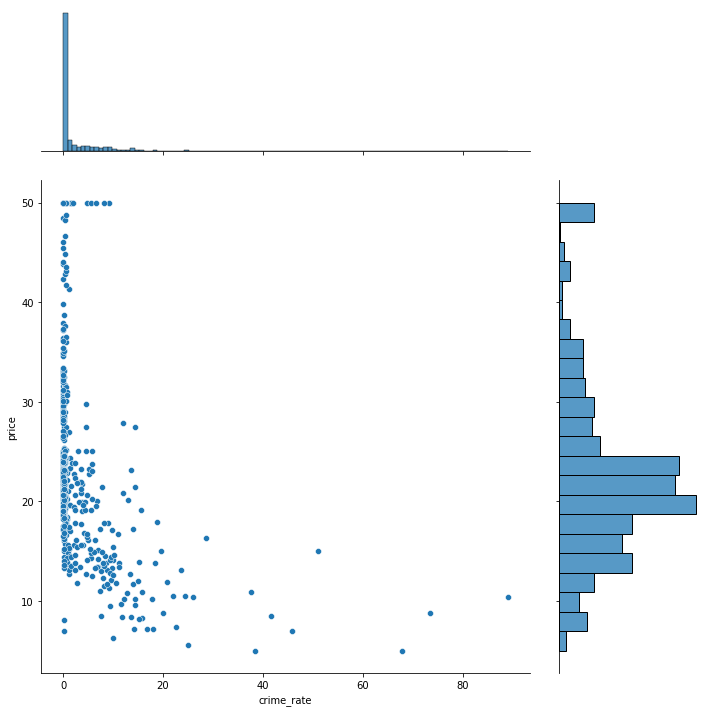

In [ ]:
sns.jointplot(x='crime_rate',y='price',data=df,kind='scatter',height=10, ratio=3,) #kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

In [ ]:
# despues de mirar los outlier los quitaremos para tomar buenas medias 
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,22.578715,3.588968,41.126526,0.553869,6.287412,68.464056,3.985221,3.641988,3.973394,3.630462,21.541165,12.599116,7.899767,12.867407,39.305221
std,9.191142,8.605442,6.881695,0.115869,0.703900,28.253422,2.112560,2.113405,2.125105,2.104930,2.162552,7.152105,1.476683,2.700708,12.535150
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000
25%,17.025000,0.080573,35.145000,0.449000,5.885500,44.550000,2.270000,1.940000,2.232500,1.940000,19.800000,6.905000,6.634500,11.189800,28.000000
50%,21.200000,0.253715,39.690000,0.538000,6.210000,77.150000,3.405000,3.050000,3.395000,3.105000,20.950000,11.300000,7.999000,13.048800,40.000000
75%,25.000000,3.647422,48.100000,0.624000,6.623500,94.100000,5.400000,5.000000,5.417500,5.005000,22.600000,16.930000,9.088000,14.169400,50.750000
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.200000,60.000000


In [ ]:
df.info() # aqui euna ves podemo ver que todas las columnas tienen 498 datos y no hay faltantes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        498 non-null    float64
 1   crime_rate   498 non-null    float64
 2   resid_area   498 non-null    float64
 3   air_qual     498 non-null    float64
 4   room_num     498 non-null    float64
 5   age          498 non-null    float64
 6   dist1        498 non-null    float64
 7   dist2        498 non-null    float64
 8   dist3        498 non-null    float64
 9   dist4        498 non-null    float64
 10  teachers     498 non-null    float64
 11  poor_prop    498 non-null    float64
 12  airport      498 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  498 non-null    float64
 15  waterbody    498 non-null    object 
 16  rainfall     498 non-null    int64  
dtypes: float64(14), int64(1), object(2)
memory usage: 90.0+ KB


# Imputacion de valores perdidos

soluciones, remover columnas o imputar valores perdidos

In [ ]:
df.isnull().sum().sort_values(ascending=False,) #  para ver el Número de datos ausentes por variable

rainfall       0
dist2          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist3          0
waterbody      0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
price          0
dtype: int64

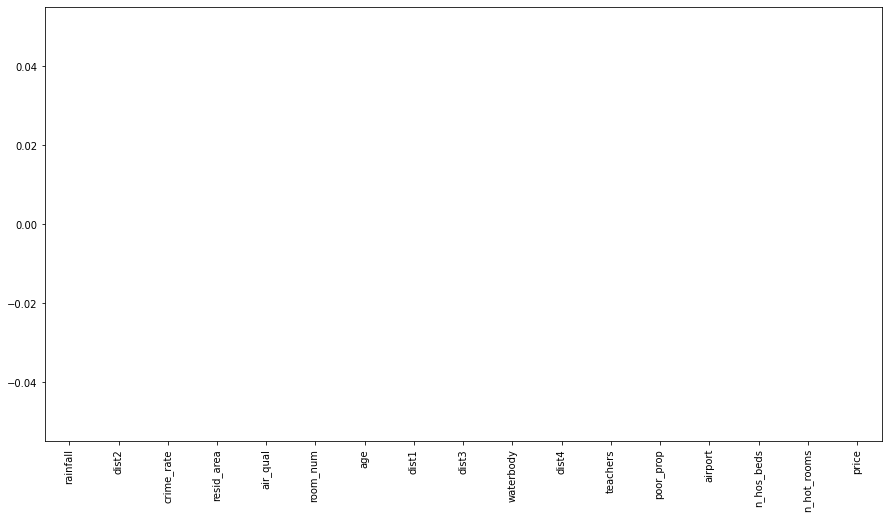

In [ ]:
# para ver mejor la cantidad de valores perdidos de estas columnas
# totalesR=df.isna().sum().sort_values(ascending=False)
# plt.figure(figsize=(15,8))
# totalesR.plot.bar()
# plt.show()

In [ ]:
# una forma de imputar valores perdidos
# from sklearn.impute import SimpleImputer
# imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
# x=dfA[['n_hos_beds']]
# dfA['n_hos_beds']=imp.fit_transform(x)

# otra forma seria

# df.n_hos_beds= df.n_hos_beds.fillna(df.n_hos_beds.mean())

# o de este modo

# df= df.fillna(df..mean())

In [ ]:
# estacionaidada Mmonth = mu_year / mu_month

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        498 non-null    float64
 1   crime_rate   498 non-null    float64
 2   resid_area   498 non-null    float64
 3   air_qual     498 non-null    float64
 4   room_num     498 non-null    float64
 5   age          498 non-null    float64
 6   dist1        498 non-null    float64
 7   dist2        498 non-null    float64
 8   dist3        498 non-null    float64
 9   dist4        498 non-null    float64
 10  teachers     498 non-null    float64
 11  poor_prop    498 non-null    float64
 12  airport      498 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  498 non-null    float64
 15  waterbody    498 non-null    object 
 16  rainfall     498 non-null    int64  
dtypes: float64(14), int64(1), object(2)
memory usage: 90.0+ KB


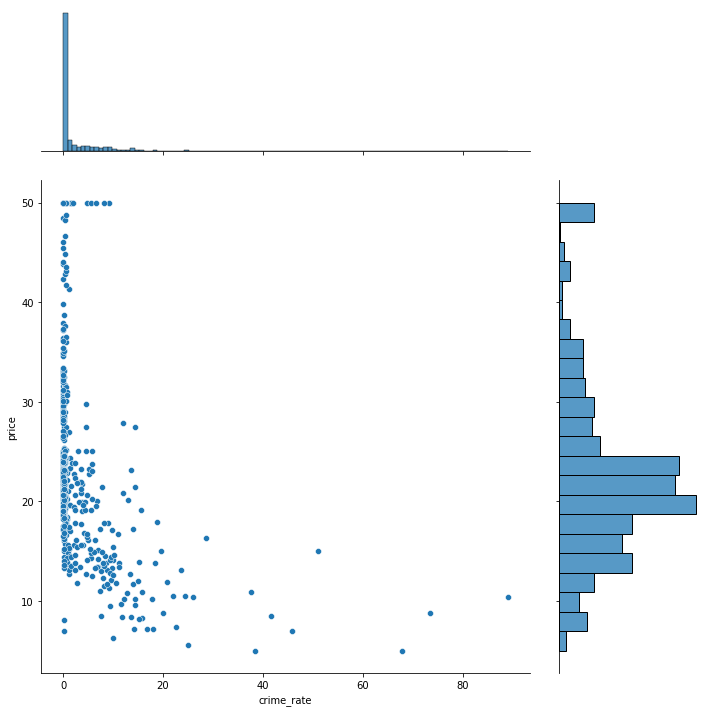

In [ ]:
sns.jointplot(x='crime_rate',y='price',data=df,kind='scatter',height=10, ratio=3,) #kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

In [ ]:
df.crime_rate= np.log(1+df.crime_rate)

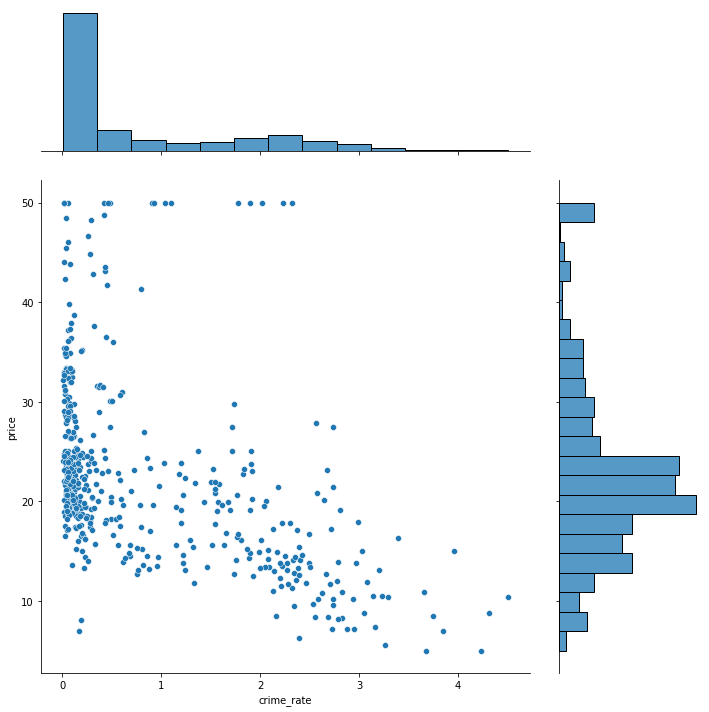

In [ ]:
sns.jointplot(x='crime_rate',y='price',data=df,kind='scatter',height=10, ratio=3,) #kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

In [ ]:
# creacion nueva variable
df['avg_dist']=(df.dist1+df.dist2+df.dist3+df.dist4)/4

In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,22.578715,0.809517,41.126526,0.553869,6.287412,68.464056,3.985221,3.641988,3.973394,3.630462,21.541165,12.599116,7.899767,12.867407,39.305221,3.807766
std,9.191142,1.019856,6.881695,0.115869,0.703900,28.253422,2.112560,2.113405,2.125105,2.104930,2.162552,7.152105,1.476683,2.700708,12.535150,2.110826
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,1.127500
25%,17.025000,0.077491,35.145000,0.449000,5.885500,44.550000,2.270000,1.940000,2.232500,1.940000,19.800000,6.905000,6.634500,11.189800,28.000000,2.100625
50%,21.200000,0.226111,39.690000,0.538000,6.210000,77.150000,3.405000,3.050000,3.395000,3.105000,20.950000,11.300000,7.999000,13.048800,40.000000,3.240000
75%,25.000000,1.536265,48.100000,0.624000,6.623500,94.100000,5.400000,5.000000,5.417500,5.005000,22.600000,16.930000,9.088000,14.169400,50.750000,5.213750
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.200000,60.000000,12.127500


In [ ]:
# del df['dist1'] # para eliminar la columna dist1